<a href="https://colab.research.google.com/github/shubham2105/sentiment_analysis/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#importing essential libraries 

import textblob
from textblob import TextBlob
import tweepy
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [ ]:
#Load The data with elp o f google-colab (optional if u have a csv file else u can follow th next step )
from google.colab import files 
uploaded =files.upload()


Saving Login_credentials.csv to Login_credentials (1).csv


In [ ]:
#get data 
log = pd.read_csv('Login_credentials.csv')

FileNotFoundError: ignored

In [3]:
#Twitter API Credentials and establishing connection throught twitter api by providing the keyword for which u want to search relate tweets 
consumerKey = '0rJyQYURbi3xTEqIQXATMYEvg'
consumerSecret = 'upinKIxrK0DatmLzW7sLiqggKmindXDYzGpzLFM3OukQZLc25z'
accessToken = '3227828672-FPEDQfsCi4YFESr1o5BbBALAaBnqqZ0ngnM21iG'
accessTokenSecret = 'nT7pvhGHj70k5dHbrtzNzN1nx9URymYEPPbBk2KVZg2wI'
auth = tweepy.OAuthHandler(consumerKey,consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(auth)
public_tweets = api.search('Joe Biden')
for tweet in public_tweets:
  print(tweet.text)
  analysis = TextBlob(tweet.text)
  print(analysis.sentiment)

RT @ImSpeaking13: The same people who can’t pick up on Joe Biden’s sarcasm saying he’s been in the senate for 120 years are the same people…
Sentiment(polarity=0.0, subjectivity=0.125)
RT @itsJeffTiedrich: holy fucking shit, Joe Biden knows how to president
Sentiment(polarity=-0.2, subjectivity=0.8)
RT @BilalTraders5: https://t.co/xRPXETIn1K
Sentiment(polarity=0.0, subjectivity=0.0)
RT @SueH731: @Twitter @Facebook
Please BAN DONALD TRUMP, JR IMMEDIATELY
https://t.co/h1R8YwOya4
Sentiment(polarity=0.0, subjectivity=0.0)
@chris_notcapn I keep thinking of what an opportunity it would be to ask the President a question.... and one of th… https://t.co/9NpSzp5wpQ
Sentiment(polarity=0.0, subjectivity=0.0)
WHY doesn't Joe Biden have a Twitter account?

Wouldn't his 'stream of consciousness' be entertaining? https://t.co/EaAbrOSlPo
Sentiment(polarity=0.5, subjectivity=0.7)
RT @WBTV_News: President Joe Biden said his “plan is to run for reelection, that is my expectation.” at his first news confe

In [4]:
# Extracting last 100 tweets from the tweet acccount 
posts =api.user_timeline(screen_name='Bill Gates',count =100,lang ="en",tweet_mode="extended")

#Print last 5 tweets from the account 
print("Show the 5 recent tweets: \n")
i= 1
for tweet in posts[0:5]:
  print(str(i)+')'+tweet.full_text+'\n')
  i=i+1;

Show the 5 recent tweets: 

1)@meudaysamant atleast give us some clear indicatons regarding our academics, and also look upon active Covid-19 cases before deciding, and do it ASAP coz u have already taken alot time
#MumbaiUniversity

2)There We Go
#NeverSettle #OnePlus8. https://t.co/BC1340EH5a https://t.co/5CigfelKut

3)#IndiaDeservesBetter #CoronaLessons https://t.co/0kMkmuxYgJ

4)Country has mindful Govt but Mindless so called janta, This people who act brave in front of medical officers and stranded police officials, if u have so much of nuts then go protect country on border 
 government should leave this dogs when they come for treatment #Govt

5)You don't need to recapture it, u still innocent as child who reads those bed time story books and believes its true, like unicorns😀❤️@TheAjMendez https://t.co/yl3kk6Cgxn



In [5]:
#creating a DataFrame with acolumn called tweets
df =pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

#show the first 5 rows of data 
df.head()

,Tweets
0,@meudaysamant atleast give us some clear indic...
1,There We Go\n#NeverSettle #OnePlus8. https://t...
2,#IndiaDeservesBetter #CoronaLessons https://t....
3,Country has mindful Govt but Mindless so calle...
4,"You don't need to recapture it, u still innoce..."


In [6]:
#Clean the text 
#Creating a function to clean the tweets 
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '',text) #Remove @metions
  text = re.sub(r'#','',text)#Removing the '#' symbol
  text = re.sub(r'RT[\s]+','',text)#Removing RT
  text = re.sub(r'https?:\/\/\S+','',text)#Removing the Hyperlink

  return text

df['Tweets']= df['Tweets'].apply(cleanTxt)

#Show The Clean Data 
df

,Tweets
0,atleast give us some clear indicatons regardi...
1,There We Go\nNeverSettle OnePlus8.
2,IndiaDeservesBetter CoronaLessons
3,Country has mindful Govt but Mindless so calle...
4,"You don't need to recapture it, u still innoce..."
5,GTA 4 Crack Download Free -


In [7]:
# Creating a Funtion to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Creating a Function to get the Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Creating two new columns 
df['Subjectivity'] =df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with thh new columns 
df

,Tweets,Subjectivity,Polarity
0,atleast give us some clear indicatons regardi...,0.491667,-0.016667
1,There We Go\nNeverSettle OnePlus8.,0.000000,0.000000
2,IndiaDeservesBetter CoronaLessons,0.000000,0.000000
3,Country has mindful Govt but Mindless so calle...,0.525000,0.200000
4,"You don't need to recapture it, u still innoce...",0.675000,0.425000
5,GTA 4 Crack Download Free -,0.800000,0.400000


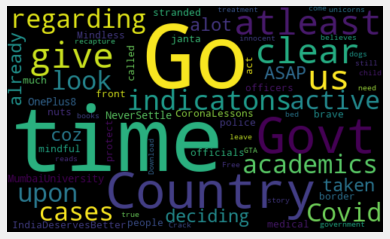

In [16]:
# Plot the WorldCloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width =500,height=300,random_state =21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation ="bilinear")
plt.axis('off')
plt.show()

In [24]:
#Create a function to compute the negativr,neutral and positive analysis
def getAnalysis(score):
   if score < 0:
     return 'Negative'
   elif score == 0:
      return 'Neutral'
   else:
      return 'Positive'

df['Analysis']= df['Polarity'].apply(getAnalysis)

#Show the  dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,atleast give us some clear indicatons regardi...,0.491667,-0.016667,Negative
1,There We Go\nNeverSettle OnePlus8.,0.000000,0.000000,Neutral
2,IndiaDeservesBetter CoronaLessons,0.000000,0.000000,Neutral
3,Country has mindful Govt but Mindless so calle...,0.525000,0.200000,Positive
4,"You don't need to recapture it, u still innoce...",0.675000,0.425000,Positive
5,GTA 4 Crack Download Free -,0.800000,0.400000,Positive


In [31]:
 # Print all of the positive tweets 
 j=1 
 sortedDF = df.sort_values(by=['Polarity'])
 for i in range(0,sortedDF.shape[0]):
   if (sortedDF['Analysis'][i]=='Positive'):
    print(str (j)+') '+sortedDF['Tweets'][i])
    print()
    j =j+1

1) Country has mindful Govt but Mindless so called janta, This people who act brave in front of medical officers and stranded police officials, if u have so much of nuts then go protect country on border 
 government should leave this dogs when they come for treatment Govt

2) You don't need to recapture it, u still innocent as child who reads those bed time story books and believes its true, like unicorns😀❤️ 

3) GTA 4 Crack Download Free -  

